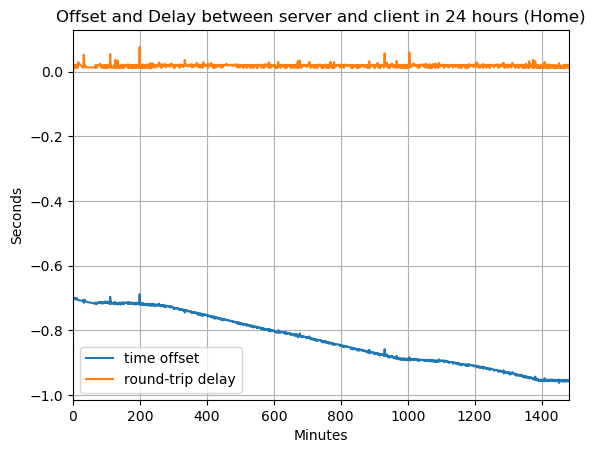

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def read_data(filename):
    with open(filename, 'r') as file:
        next(file)
        contents = file.readlines()
        
    output = []
    for line in contents:
        m, o, r = line.strip().split()
        output.append([float(m), float(o), float(r)])
    
    return np.array(output).T

# Offset is the time difference, RTT is the delay
time, offset, rtt = read_data('home_data.txt')
start = time[0]
time -= start
plt.plot(time, offset, label='time offset')
plt.plot(time, rtt, label='round-trip delay')
plt.title('Offset and Delay between server and client in 24 hours (Home)')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.xlabel('Minutes')
plt.xlim([0, max(time)])
plt.ylabel('Seconds')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
coeffs1 = np.polyfit(time, time_diff, deg=2)
model1 = np.polyval(coeffs1, time)
resid1 = time_diff - model1

coeffs2 = np.polyfit(time, delay, deg=2)
model2 = np.polyval(coeffs2, time)
resid2 = delay - model2

time /= 60

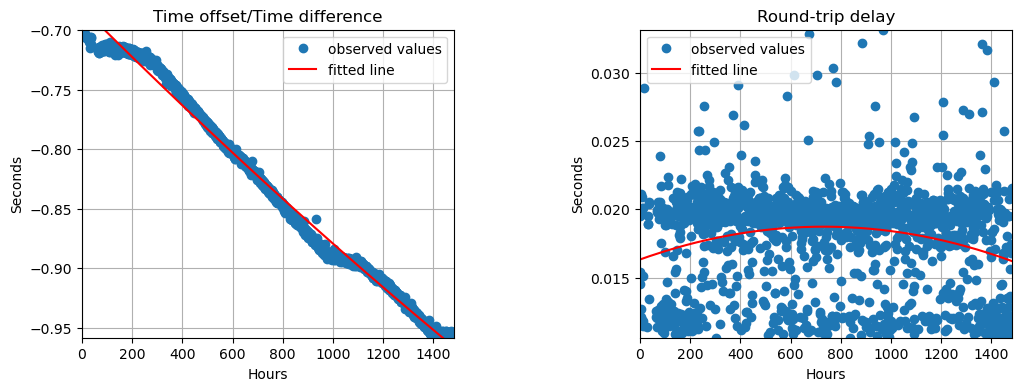

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(time, time_diff, 'o', label='observed values')
ax[0].plot(time, model1, color='red', label='fitted line')
ax[0].set_xlabel('Hours')
ax[0].set_xlim([0, max(time)])
ax[0].set_ylabel('Seconds')
ax[0].set_ylim([min(time_diff), max(time_diff)])
ax[0].set_title('Time offset/Time difference')
ax[0].grid('on', 'both')
ax[0].legend()

ax[1].plot(time, delay, 'o', label='observed values')
ax[1].plot(time, model2, color='red', label='fitted line')
ax[1].set_xlabel('Hours')
ax[1].set_xlim([0, max(time)])
# ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].set_ylabel('Seconds')
ax[1].set_ylim([min(delay), max(delay)])
ax[1].set_title('Round-trip delay')
ax[1].grid('on', 'both')
# ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.0015))
ax[1].legend()

plt.subplots_adjust(wspace=0.5)
plt.show()

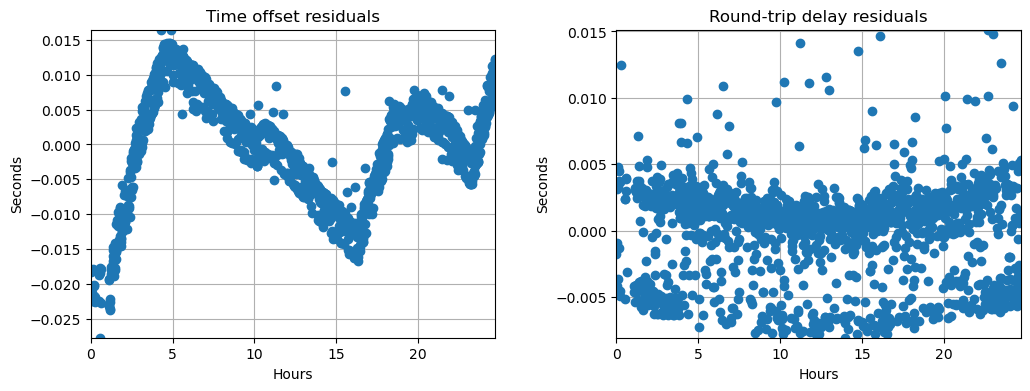

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(time, resid1, 'o')
ax[0].set_xlabel('Hours')
ax[0].set_xlim([min(time), max(time)])
ax[0].set_ylabel('Seconds')
ax[0].set_ylim([min(resid1), max(resid1)])
ax[0].set_title('Time offset residuals')
ax[0].grid('on', 'both')

ax[1].plot(time, resid2, 'o')
ax[1].set_xlabel('Hours')
ax[1].set_xlim([min(time), max(time)])
ax[1].set_ylabel('Seconds')
ax[1].set_ylim([min(resid2), max(resid2)])
ax[1].set_title('Round-trip delay residuals')
ax[1].grid('on', 'both')

plt.subplots_adjust(wspace=0.3)
plt.show()

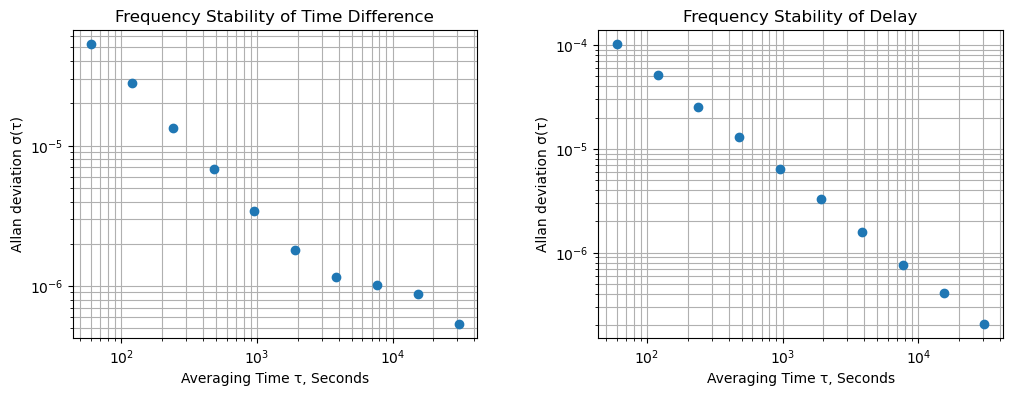

In [8]:
import allantools

taus1, allan_var1, _, _ = allantools.oadev(resid1, rate=1/60, data_type='phase') # 1-min intervals 
taus2, allan_var2, _, _ = allantools.oadev(resid2, rate=1/60, data_type='phase') # 1 sec = 1/60 minutes

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].loglog(taus1, allan_var1, 'o')
ax[0].set_xlabel('Averaging Time τ, Seconds')
ax[0].set_ylabel('Allan deviation σ(τ)')
# ax[0].set_ylim([1e-7, 1e-4])
ax[0].set_title('Frequency Stability of Time Difference')
ax[0].grid('on', 'both')

ax[1].loglog(taus2, allan_var2, 'o')
ax[1].set_xlabel('Averaging Time τ, Seconds')
ax[1].set_ylabel('Allan deviation σ(τ)')
# ax[1].set_ylim([1e-7, 1e-4])
ax[1].set_title('Frequency Stability of Delay')
ax[1].grid('on', 'both')

plt.subplots_adjust(wspace=0.3)
plt.show()